## Introducción

El conjunto de datos consiste en un grupo de imágenes fueron liberadas bajo [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/) pudiéndose descargar en esta [página](https://zenodo.org/record/53169/export/hx).

Cabe mencionar que la realización de los experimentos fue aprobada por el comité de ética de la Universidad de Heildelberg (Alemania) tal y como mencionan los autores Kather et al. en su [artículo](https://www.nature.com/articles/srep27988?WT.feed_name=subjects_translational-research) y así mismo se siguió la [Declaración de Helsinki](http://www.who.int/bulletin/archives/79%284%29373.pdf).

## Exploración del conjunto de datos

### Conjunto de datos 1

En este conjunto se hallan 8 categorías de tejido, listadas a continuación. En cada una de ellas hay 625 imágenes que **no se solapan entre sí**. Cada imagen tiene un tamaño de 150x150 px (píxeles), que se corresponden con 74$\mathrm{\mu}$m de tejido. En total son 5000 imágenes.

Categorías seleccionadas por los investigadores
1. Epitelio canceroso: Tejido epitelial, una o varias capas de celulas que constituyen revestimiento interno de organos y cavidades asi como la citada mucosa. https://es.wikipedia.org/wiki/Epitelio
2. Estroma simple (de composición homogenea, estroma tumoroso, estroma extra-tumoral y tejido blando): Se trata de la matriz extracelular, es un medio de integracion fisiologico, en el que están embebidas las células, en este caso la composición es homogénea https://es.wikipedia.org/wiki/Estroma_(histolog%C3%ADa) y https://es.wikipedia.org/wiki/Matriz_extracelular
3. Estroma complejo (células tumorosas y/o alguna célula inmune): Como el anterior pero en este caso, se hallan celulas tumorosas y alguna inmune
4. Células inmunes (conglomerado de células inmunes y folículos linfoides submucosos): Foliculo linfoide es una agrupacion de celulas sin organización / estructura, que se encuentra asociado a mucosas. Foliculo linfoide → https://es.wikipedia.org/wiki/Tejido_linfoide_asociado_a_las_mucosas. En el caso de esta investigacion GALT.
5. Material variado (mucosas, hemorrargía, necrosado): necrosado → conjunto de material muerto por patologia
6. Glándulas mucosas normales
7. Tejido adiposo: Tejido conjuntivo cuyas celulas acumulan lipidos en su citoplasma, cumple funciones mecánicas asi como fisiologicas. https://es.wikipedia.org/wiki/Tejido_adiposo
8. Imagen de fondo (no se corresponde con tejido)

### Conjunto de datos 2

Se hallan 10 imágenes grandes, de tamaño 5000x5000 px, que provienen de distinta región con respecto a las imágenes del conjunto anterior. Según los investigadores pueden ser usadas para comprobar distintas combinaciones de descriptores de textura o clasificadores en un entorno real.

Nota 1:

Los autores liberaron los dos conjuntos de imágenes, si bien se realiza la implementación de redes convolucionales con el primero de ellos.

Nota 2:

Al provenir de tan solo 10 pacientes hay que tener en cuenta el sesgo que se comete en esta investigación.

## Conjunto de datos 1

A continuación, se muestra la estructura del conjunto de datos. Las imágenes están ordenadas en subcapetas, habiendo 625 en cada una de ellas. En total 5000.

In [1]:
PATH_TO_IMG = "input_dataset"
PATH_TO_OUTPUT = "output_dataset"

img_folder = []
img_labels = []
img_list = []

In [2]:
import os

img_folder = sorted([folder for folder in os.listdir(PATH_TO_IMG)
                  if os.path.isdir(os.path.join(PATH_TO_IMG, folder))])

print("Categories in the dataset: ",img_folder) # category = label = folder

Categories in the dataset:  ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']


Nota: La siguiente celda no conviene ejecutarla, es un comando de bash (consola linux)

bash command --> $tree -d img-raw/
bash linux output

img-raw/
├── 01_TUMOR
├── 02_STROMA
├── 03_COMPLEX
├── 04_LYMPHO
├── 05_DEBRIS
├── 06_MUCOSA
├── 07_ADIPOSE
└── 08_EMPTY

8 directories

In [3]:
for index_folder, category in enumerate(img_folder):
    
    folder = os.path.join(PATH_TO_IMG, category)

    for index_img, img in enumerate(os.listdir(folder)):
        
        if img.endswith(".tif"): # just in case there are other kind of files like .db
            img_list.append(os.path.join(folder, img))
            img_labels.append(img_folder[index_folder])

    print("Category {0:s} has {1:d} images.".format(category, index_img+1))

print()
print("The dataset has: {0:d} images.".format(len(img_labels)))

Category 01_TUMOR has 625 images.
Category 02_STROMA has 625 images.
Category 03_COMPLEX has 625 images.
Category 04_LYMPHO has 625 images.
Category 05_DEBRIS has 625 images.
Category 06_MUCOSA has 625 images.
Category 07_ADIPOSE has 625 images.
Category 08_EMPTY has 625 images.

The dataset has: 5000 images.


Cada imagen tiene 150x150 px, por lo que tiene 22500 *características* (features).

Las imágenes histológicas están en formato [TIF](https://en.wikipedia.org/wiki/TIFF).

In [ ]:
# execute once!
# f_img_labels = open(os.path.join(PATH_TO_OUTPUT,'img_labels'),'w')
# f_img_list = open(os.path.join(PATH_TO_OUTPUT,'img_list'),'w')


# for label in img_labels:
#     f_img_labels.write(label+"\n")

# for path in img_list:
#     f_img_list.write(path+"\n")


Se muestra el formato de una imagen aleatoria del conjunto.

Image's relative path: input_dataset/01_TUMOR/103B7_CRC-Prim-HE-02_026.tif_Row_1_Col_451.tif
Image's category: 01_TUMOR

Image's metadata
Image's extension: TIFF. Image's size (width, height): (150, 150). Image's mode: RGB.

The actual image: 



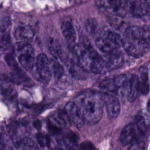

In [4]:
from PIL import Image
import random
import re

# get a random image shape from imgList and its attributes
random_image_path = img_list[random.randint(0, len(img_list))]
random_image = Image.open(random_image_path)
extension, size, mode = random_image.format, random_image.size, random_image.mode

print("Image's relative path: {0:s}".format(random_image_path))
print("Image's category: {0:s}".format(re.split('_\d+',random_image_path.split('/')[1])[0]))
print()
print("Image's metadata")
print("Image's extension: {0:s}. Image's size (width, height): ({1:d}, {2:d}). Image's mode: {3:s}.".\
      format(extension, size[0],size[1],mode))
print()
print("The actual image: ")
print()

random_image

Se comprueba que todas las imágenes del conjunto poseen el mismo formato.

In [5]:
error = 0

for count, img in enumerate(img_list):
    
    if (Image.open(img).format != 'TIFF' ) or \
    (Image.open(img).size[0] != 150) or \
    (Image.open(img).size[1] != 150) or \
    (Image.open(img).mode != 'RGB'): 
        print("Image %s has got something different: " % img)
        error += 1

if (error == 0): print("Process finished with no errors.")
else: print("There is %d images in the dataset with some distinct image's parameters")

Process finished with no errors.


## Mejoras

* mejora de código en general y estructuras, usando otras librerias más eficientes
* mejora del análisis del conjunto de datos (comprobación de los formatos de las imágenes etc.)
* control de errores en cada parte del proceso